In [17]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [18]:
documents = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]

In [19]:
from pprint import pprint  # pretty-printer
from collections import defaultdict

# remove common words and tokenize
stoplist = set('for a of the and to in'.split())
texts = [
    [word for word in document.lower().split() if word not in stoplist]
    for document in documents
]

# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]

pprint(texts)

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]


In [20]:
from gensim import corpora
dictionary = corpora.Dictionary(texts)
dictionary.save('/tmp/deerwester.dict')  # store the dictionary, for future reference
print(dictionary)

2021-12-04 14:42:14,793 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-12-04 14:42:14,797 : INFO : built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)
2021-12-04 14:42:14,800 : INFO : saving Dictionary object under /tmp/deerwester.dict, separately None
2021-12-04 14:42:14,811 : INFO : saved /tmp/deerwester.dict


Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...)


In [10]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

corpus = ['sasha like coffer', 'sasha like nutella', 'sasha like his parents', 'glory glory manchester united']

vectorizer = TfidfVectorizer(analyzer='char_wb', ngram_range=(3,3))
sparse_matrix = vectorizer.fit_transform(corpus)
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, columns=vectorizer.get_feature_names())
df

co        gl        hi        li       ma        nu        pa  \
0  0.32812  0.000000  0.000000  0.209435  0.00000  0.000000  0.000000   
1  0.00000  0.000000  0.000000  0.195434  0.00000  0.306186  0.000000   
2  0.00000  0.000000  0.270501  0.172657  0.00000  0.000000  0.270501   
3  0.00000  0.335099  0.000000  0.000000  0.16755  0.000000  0.000000   

         sa       un      anc  ...       ry        sas       sha      ste  \
0  0.209435  0.00000  0.00000  ...  0.000000  0.209435  0.209435  0.00000   
1  0.195434  0.00000  0.00000  ...  0.000000  0.195434  0.195434  0.00000   
2  0.172657  0.00000  0.00000  ...  0.000000  0.172657  0.172657  0.00000   
3  0.000000  0.16755  0.16755  ...  0.335099  0.000000  0.000000  0.16755   

       ted       tel      ter       ts       uni       ute  
0  0.00000  0.000000  0.00000  0.000000  0.00000  0.000000  
1  0.00000  0.306186  0.00000  0.000000  0.00000  0.306186  
2  0.00000  0.000000  0.00000  0.270501  0.00000  0.000000  
3  0.16755  0.000000  0.16755  0.000000  0.16755  0.000000  

[4 rows x 52 columns]

In [12]:
corpus = ['sasha like coffer', 'sasha like nutella', 'sasha like his parents', 'glory glory manchester united']

vectorizer = CountVectorizer(ngram_range=(3,3), analyzer='char')
sparse_matrix = vectorizer.fit_transform(corpus)
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, columns=vectorizer.get_feature_names())
df

co   gl   hi   li   ma   nu   pa   un  a l  anc  ...  sas  sha  ste  ted  \
0    1    0    0    1    0    0    0    0    1    0  ...    1    1    0    0   
1    0    0    0    1    0    1    0    0    1    0  ...    1    1    0    0   
2    0    0    1    1    0    0    1    0    1    0  ...    1    1    0    0   
3    0    1    0    0    1    0    0    1    0    1  ...    0    0    1    1   

   tel  ter  uni  ute  y g  y m  
0    0    0    0    0    0    0  
1    1    0    0    1    0    0  
2    0    0    0    0    0    0  
3    0    1    1    0    1    1  

[4 rows x 56 columns]

# Gensim

https://radimrehurek.com/gensim/auto_examples/core/run_core_concepts.html#sphx-glr-auto-examples-core-run-core-concepts-py

In [1]:
import pprint
document = "Human machine interface for lab abc computer applications"
text_corpus = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]

In [2]:
stoplist = set('for a of the and to in'.split(' '))
# Lowercase each document, split it by white space and filter out stopwords
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in text_corpus]

# Count word frequencies
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

# Only keep words that appear more than once
processed_corpus = [[token for token in text if frequency[token] > 1] for text in texts]
pprint.pprint(processed_corpus)

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]


In [3]:
from gensim import corpora

dictionary = corpora.Dictionary(processed_corpus)
print(dictionary)

Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...)


In [4]:
new_doc = "Human computer interaction"
new_vec = dictionary.doc2bow(new_doc.lower().split())
print(new_vec)

[(0, 1), (1, 1)]


In [5]:
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]
pprint.pprint(bow_corpus)

[[(0, 1), (1, 1), (2, 1)],
 [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(2, 1), (5, 1), (7, 1), (8, 1)],
 [(1, 1), (5, 2), (8, 1)],
 [(3, 1), (6, 1), (7, 1)],
 [(9, 1)],
 [(9, 1), (10, 1)],
 [(9, 1), (10, 1), (11, 1)],
 [(4, 1), (10, 1), (11, 1)]]


In [6]:
from gensim import models

# train the model
tfidf = models.TfidfModel(bow_corpus)

# transform the "system minors" string
words = "system minors".lower().split()
print(tfidf[dictionary.doc2bow(words)])

[(5, 0.5898341626740045), (11, 0.8075244024440723)]


In [7]:
from gensim import similarities

index = similarities.SparseMatrixSimilarity(tfidf[bow_corpus], num_features=12)

In [8]:
query_document = 'system engineering'.split()
query_bow = dictionary.doc2bow(query_document)
sims = index[tfidf[query_bow]]
print(list(enumerate(sims)))

[(0, 0.0), (1, 0.32448703), (2, 0.41707572), (3, 0.7184812), (4, 0.0), (5, 0.0), (6, 0.0), (7, 0.0), (8, 0.0)]


In [9]:
for document_number, score in sorted(enumerate(sims), key=lambda x: x[1], reverse=True):
    print(document_number, score)

3 0.7184812
2 0.41707572
1 0.32448703
0 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0


In [2]:
import sys
import imp
sys.path.append('../src/')

import text_cleanup.text_cleanup as thesisCleanUp
import preprocessing.text_preprocessing as thesisTextPreprocessing
import data.reader as thesisDataReader
import utils.utils as thesisUtils

imp.reload(thesisCleanUp)
imp.reload(thesisTextPreprocessing)
imp.reload(thesisDataReader)
imp.reload(thesisUtils)

<module 'utils.utils' from '../src/utils/utils.py'>

In [3]:
a_zwickau_text = thesisDataReader.read_a_zwickau()
a_zwickau_corpus = thesisCleanUp.create_corpus_by_line(thesisCleanUp.jvtext(a_zwickau_text))

a_zwickau_processed_corpus = [[word for word in document.split()] for document in a_zwickau_corpus]
pprint.pprint(a_zwickau_processed_corpus)

AttributeError: module 'data.reader' has no attribute 'read_a_zwickau'

In [12]:
dictionary = corpora.Dictionary(a_zwickau_processed_corpus)
print(dictionary)

Dictionary(6388 unique tokens: ['(112ub)', 'descripcio', 'incipit', 'sancte', 'terre']...)


In [13]:
bow_corpus = [dictionary.doc2bow(text) for text in a_zwickau_processed_corpus[0:25]]
pprint.pprint(bow_corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 3),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 2),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 8),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 2),
  (37, 1),
  (38, 2),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 3),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 1),
  (92

  (991, 1),
  (992, 1),
  (993, 1),
  (994, 1),
  (995, 2),
  (996, 1),
  (997, 1),
  (998, 1),
  (999, 1)],
 [(17, 1),
  (26, 1),
  (27, 2),
  (28, 6),
  (29, 1),
  (36, 1),
  (65, 2),
  (280, 1),
  (364, 1),
  (410, 2),
  (411, 1),
  (548, 1),
  (600, 1),
  (616, 1),
  (622, 1),
  (625, 1),
  (626, 1),
  (629, 1),
  (641, 1),
  (651, 1),
  (657, 1),
  (658, 1),
  (659, 1),
  (746, 1),
  (861, 1),
  (982, 1),
  (1000, 1),
  (1001, 1),
  (1002, 1),
  (1003, 1),
  (1004, 1),
  (1005, 1),
  (1006, 1),
  (1007, 1),
  (1008, 1),
  (1009, 2),
  (1010, 1),
  (1011, 1),
  (1012, 1),
  (1013, 1),
  (1014, 1),
  (1015, 1),
  (1016, 1),
  (1017, 2),
  (1018, 1),
  (1019, 1),
  (1020, 1),
  (1021, 1)],
 [(27, 4),
  (28, 6),
  (36, 2),
  (66, 1),
  (90, 2),
  (152, 2),
  (153, 1),
  (181, 1),
  (221, 1),
  (280, 1),
  (285, 1),
  (338, 1),
  (389, 1),
  (485, 3),
  (537, 1),
  (540, 1),
  (562, 1),
  (578, 1),
  (600, 1),
  (614, 1),
  (616, 1),
  (622, 1),
  (648, 1),
  (651, 1),
  (657, 2),
  (6

In [14]:
tfidf = models.TfidfModel(bow_corpus)

In [ ]:
for query_bow in bow_corpus:
    sims = index[tfidf[query_bow]]
    pprint.pprint(list(enumerate(sims)))
#     print(bow)

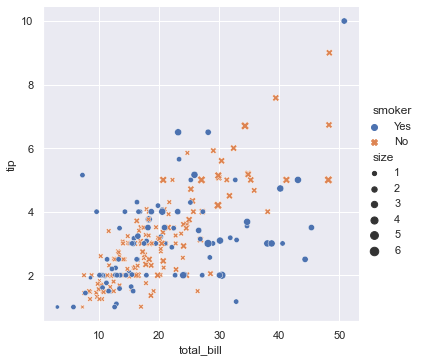

In [4]:
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip",
    hue="smoker", style="smoker", size="size",
)

In [2]:
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [10]:
# importing local modules

import imp
import sys
sys.path.append('../src/')

import text_cleanup.text_cleanup as thesisCleanUp
import preprocessing.text_preprocessing as thesisTextPreprocessing
import data.reader as thesisDataReader
import utils.utils as thesisUtils
import features.tf_idf.n_gram as thesisTfIdfNgramFeatures

imp.reload(thesisCleanUp)
imp.reload(thesisTextPreprocessing)
imp.reload(thesisDataReader)
imp.reload(thesisUtils)
imp.reload(thesisTfIdfNgramFeatures)

<module 'features.tf_idf.n_gram' from '../src/features/tf_idf/n_gram.py'>

In [12]:
a_zwickau_text = thesisDataReader.read_a_zwickau()

In [13]:
len(a_zwickau_text)

178209

In [31]:
a_zwickau_text = thesisCleanUp.cleanup(thesisCleanUp.jvtext(a_zwickau_text))
len(a_zwickau_text)

174496

In [37]:
174496/574

304.0

In [32]:
b_london_text = thesisDataReader.read_b_london()
len(b_london_text)

197971

In [33]:
b_london_text = thesisCleanUp.cleanup(thesisCleanUp.jvtext(b_london_text))
len(b_london_text)

194357

In [46]:
194357/306

635.1535947712418

In [19]:
n = 304
chunks = [a_zwickau_text[i:i+n] for i in range(0, len(a_zwickau_text), n)]
print(chunks)

['(112ub) Incipit descripcio terre sancte \nCum sicut dicit Ieronimus quosdam inueniamus lustrasse prouincias maria transfretasse ut ea que ex scripturis nouerant coram uiderent ut Plato Memphiticos uates et Egiptum Appollonius qui Persas intrauit transiuit Cancasum Albanos Stichas Massagetas quoque ut Yar', 'cham uideret et tandem Egiptum intrauit ut famosam mensam solis uideret in sabulo quid mirum si Christiani terram illam quam Christi sonant ecclesie uniuerse uidere et uisitare desiderant Uenerabantur antiqui sancta sanctorum quia ibi erat archa testamenti et chernibulum cum propiciatorio et manna et ui', 'rga Aaron que fronduerat que omnia erant umbra Nonne uenerabilius est apud nos sepulcrum dulcis Ihesu quod quotiens quis ingreditur totiens inuolutum syndone mentis oculis uidet saluatorem et paululum procedens uidet lapidem reuolutum angelum in eo sedentem et sudarium cum linthiaminibus mulieribus oste', 'ndentem \nQuis Christianus hiis uisis non festinabit uenire in Bethleem c

In [22]:
['asd','sad', 'ddd'].join('.')

AttributeError: 'list' object has no attribute 'join'

In [26]:
a_zwickau_text = thesisDataReader.read_a_zwickau()
a_zwickau_corpus = thesisCleanUp.create_corpus_by_line(thesisCleanUp.jvtext(a_zwickau_text))


In [29]:
a_zwickau_joined = ' '.join(a_zwickau_corpus)

In [30]:
n = 304
chunks = [a_zwickau_joined[i:i+n] for i in range(0, len(a_zwickau_joined), n)]
print(chunks)

['(112ub) incipit descripcio terre sancte cum sicut dicit ieronimus quosdam inueniamus lustrasse prouincias maria transfretasse ut ea que ex scripturis nouerant coram uiderent ut plato memphiticos uates et egiptum appollonius qui persas intrauit transiuit cancasum albanos stichas massagetas quoque ut yarc', 'ham uideret et tandem egiptum intrauit ut famosam mensam solis uideret in sabulo quid mirum si christiani terram illam quam christi sonant ecclesie uniuerse uidere et uisitare desiderant uenerabantur antiqui sancta sanctorum quia ibi erat archa testamenti et chernibulum cum propiciatorio et manna et uir', 'ga aaron que fronduerat que omnia erant umbra nonne uenerabilius est apud nos sepulcrum dulcis ihesu quod quotiens quis ingreditur totiens inuolutum syndone mentis oculis uidet saluatorem et paululum procedens uidet lapidem reuolutum angelum in eo sedentem et sudarium cum linthiaminibus mulieribus osten', 'dentem quis christianus hiis uisis non festinabit uenire in bethleem conte

In [79]:
import pandas as pd
import numpy as np

In [107]:
d = { 
    '2_gram': { 0: { 'mean': 23, 'max': 100 }, 1: { 'mean': 18, 'max': 45 } }, 
    '3_gram': { 0: { 'mean': 13, 'max': 234 }, 1: { 'mean': 56, 'max': 77} } 
}
d

{'2_gram': {0: {'mean': 23, 'max': 100}, 1: {'mean': 18, 'max': 45}},
 '3_gram': {0: {'mean': 13, 'max': 234}, 1: {'mean': 56, 'max': 77}}}

In [108]:
pd.DataFrame(data=d)

2_gram                    3_gram
0  {'mean': 23, 'max': 100}  {'mean': 13, 'max': 234}
1   {'mean': 18, 'max': 45}   {'mean': 56, 'max': 77}

In [267]:
import imp
import sys

sys.path.append('../src/')

import text_cleanup.text_cleanup as thesisCleanUp
import preprocessing.text_preprocessing as thesisTextPreprocessing
import data.reader as thesisDataReader
import utils.utils as thesisUtils
import features.tf_idf.n_gram as thesisTfIdfNgramFeatures
import similarities.cosine as thesisCosineSimilarity
from sklearn.metrics.pairwise import cosine_similarity

imp.reload(thesisCleanUp)
imp.reload(thesisTextPreprocessing)
imp.reload(thesisDataReader)
imp.reload(thesisUtils)
imp.reload(thesisCosineSimilarity)

<module 'similarities.cosine' from '../src/similarities/cosine.py'>

In [268]:
thesisCosineSimilarity.create_statistics_df(
    thesisDataReader.get_zwickau_corpus()[:10], 
    thesisDataReader.get_london_corpus()[:10]
)

feature_name  p_# cross/inner      mean       std       min       25%  \
0        2_gram    0       inner  0.330184  0.031923  0.267612  0.309644   
1        2_gram    1       inner  0.743052  0.170365  0.309644  0.748635   
2        2_gram    2       inner  0.695043  0.156676  0.301394  0.735036   
3        2_gram    3       inner  0.706993  0.144889  0.339946  0.708077   
4        2_gram    4       inner  0.723923  0.143030  0.354303  0.747054   
..          ...  ...         ...       ...       ...       ...       ...   
75       5_gram    5       cross  0.076544  0.031010  0.037046  0.054804   
76       5_gram    6       cross  0.074120  0.031905  0.036279  0.052462   
77       5_gram    7       cross  0.050958  0.019063  0.022669  0.036337   
78       5_gram    8       cross  0.038571  0.017849  0.017126  0.028082   
79       5_gram    9       cross  0.047020  0.020736  0.006162  0.041298   

         50%       75%       max  p_length  
0   0.339946  0.354303  0.362694        31  
1   0.777807  0.790711  0.890160       878  
2   0.746273  0.754906  0.814110       377  
3   0.746273  0.771857  0.846525       725  
4   0.757146  0.789690  0.822980       707  
..       ...       ...       ...       ...  
75  0.064931  0.099354  0.131662      1248  
76  0.056900  0.096706  0.121805      1587  
77  0.051448  0.065225  0.082332       677  
78  0.033736  0.043946  0.075010       555  
79  0.047547  0.060507  0.074081      1030  

[80 rows x 11 columns]

In [210]:


def get_cross_version_similarities(version_1, version_2):
    all_result = []
    
    columns = [
        'feature_name',
        'p_#',
        'cross/inner',
        'mean',
        'std',
        'min',
        '25%',
        '50%',
        '75%',
        'max',
        'p_length'
    ]
    
    for [feature_name, get_feature] in FEATURES:
        for p_index, p in enumerate(version_1):
            smltr = thesisCosineSimilarity.calculate_p_to_version_similarity(p, version_2, get_feature)
            smltr_ordered = thesisCosineSimilarity.get_ordered_similatiries_without_self(smltr)
            p_similarities = list(map(lambda r: r[1], smltr_ordered))
            results = get_p_stats(
                version_1,
                p_index,
                smltr_ordered,
                feature_name,
                'cross'
            )
            all_result.append(results)
            
        
    return pd.DataFrame(all_result, columns=columns)

In [211]:
df_stats2 = get_cross_version_similarities(thesisDataReader.get_zwickau_corpus(), thesisDataReader.get_london_corpus())

In [212]:
df_stats2

feature_name  p_# cross/inner      mean       std       min       25%  \
0          2_gram    0       cross  0.224355  0.044344  0.094795  0.196040   
1          2_gram    1       cross  0.717886  0.087943  0.339220  0.671314   
2          2_gram    2       cross  0.652736  0.084069  0.255004  0.605864   
3          2_gram    3       cross  0.685134  0.082717  0.296982  0.644206   
4          2_gram    4       cross  0.682334  0.081170  0.306577  0.636490   
...           ...  ...         ...       ...       ...       ...       ...   
1283       5_gram  317       cross  0.029161  0.051140  0.000000  0.017178   
1284       5_gram  318       cross  0.053915  0.049528  0.007534  0.035273   
1285       5_gram  319       cross  0.038593  0.046241  0.004112  0.024856   
1286       5_gram  320       cross  0.027031  0.045394  0.001527  0.014399   
1287       5_gram  321       cross  0.010295  0.013363  0.000000  0.000000   

           50%       75%       max  p_length  
0     0.226426  0.249956  0.406314        31  
1     0.729816  0.778917  0.976876       878  
2     0.667575  0.710704  0.987757       377  
3     0.697444  0.746539  0.979591       725  
4     0.688758  0.738882  0.980752       707  
...        ...       ...       ...       ...  
1283  0.023170  0.031463  0.895254       556  
1284  0.050318  0.064979  0.842503      1535  
1285  0.034965  0.045475  0.810284      1418  
1286  0.023159  0.034158  0.797168       520  
1287  0.006274  0.013622  0.082978        53  

[1288 rows x 11 columns]

In [203]:
df_stats = create_statistics_df(zwickau_all, thesisDataReader.get_zwickau_corpus())

[(321, 0.3826938709487431), (46, 0.36606502516231265), (269, 0.3490061753555747), (181, 0.3447623753151209), (4, 0.3413533888288436), (6, 0.333647793759186), (315, 0.32884610145033477), (280, 0.32154375625611403), (82, 0.3125671754467114), (182, 0.31217026363260847), (5, 0.31020238971641434), (76, 0.309703259925516), (8, 0.3096696802374339), (296, 0.3096301887934677), (180, 0.3071550648821553), (138, 0.3056448049711144), (19, 0.3048701934189443), (184, 0.3038987824549328), (45, 0.3018591527611855), (303, 0.3005681392833239), (10, 0.3000574063465663), (84, 0.29986338073454166), (201, 0.29971861906542996), (306, 0.29877769149799305), (185, 0.29873232246521375), (194, 0.2984485212838205), (294, 0.2978427255715767), (311, 0.2976137495562827), (20, 0.29565117887719194), (95, 0.29325017161365785), (197, 0.29271059203076394), (309, 0.2919439675177183), (295, 0.29145185071400403), (242, 0.29065656622330693), (123, 0.28997824491507446), (3, 0.28964926162484134), (7, 0.28917366949746737), (11, 0

[(299, 0.7564857482240873), (77, 0.7491305134445732), (74, 0.7449284180791587), (88, 0.7428845274903825), (297, 0.7399466155424196), (30, 0.7259552709949247), (87, 0.7251982288602402), (173, 0.7235544313360631), (78, 0.7212899612346246), (89, 0.7201844427266761), (95, 0.7197928658633368), (13, 0.7184410944686921), (54, 0.7183304073748488), (15, 0.7173937219818861), (11, 0.7161558480487178), (224, 0.7156743301461908), (211, 0.7141278788942479), (72, 0.7138606723692911), (169, 0.7132872860115637), (248, 0.7101545498036588), (152, 0.7078068220224947), (46, 0.7075135839812294), (282, 0.70736640940581), (318, 0.7069857842460043), (274, 0.7062783549748796), (281, 0.7041830685791675), (86, 0.7022850555912252), (105, 0.7020154091969301), (90, 0.7015492376332624), (123, 0.7014675515636115), (84, 0.6984362943541065), (53, 0.6980289969460407), (201, 0.6975182420997739), (107, 0.6973871670257642), (12, 0.6972109137101197), (121, 0.6962373285981427), (311, 0.6940315418404865), (52, 0.69400500263764

[(5, 0.7698855811373664), (201, 0.7657047740419582), (88, 0.7642071312400749), (173, 0.7636342031299864), (169, 0.7625407256222022), (46, 0.7596696360321117), (182, 0.7594161743353272), (152, 0.7545755077185182), (82, 0.750997610754544), (52, 0.750330729748824), (227, 0.7494397357324971), (74, 0.7489573083238674), (299, 0.748162055033065), (105, 0.7475137648857096), (45, 0.7457946063484328), (101, 0.7435752085853483), (99, 0.740720693967014), (282, 0.740540389764617), (43, 0.7402735764898505), (297, 0.7400268099637545), (87, 0.7397782381372693), (121, 0.7397131578139364), (109, 0.7393721918633834), (279, 0.7383268876997802), (242, 0.7364977098368548), (280, 0.7363524150528487), (12, 0.7363064797797974), (281, 0.7342280735940222), (70, 0.7337862432230216), (86, 0.731910686272071), (80, 0.7317659353664963), (53, 0.7317509779108131), (18, 0.7313303682285514), (72, 0.7312853739349284), (54, 0.7308744930844744), (303, 0.7300213125253102), (77, 0.7286446776154099), (318, 0.7282167120722242),

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[(313, 0.1319409177844996), (123, 0.12338834143109191), (299, 0.11081078739575548), (169, 0.10978880342145413), (30, 0.10624167926215537), (173, 0.10422427103443037), (131, 0.10205738731431668), (59, 0.10167075256980732), (88, 0.10073759442544936), (297, 0.1001447088893097), (36, 0.0978098977691124), (316, 0.09294928413174336), (87, 0.09153198039741567), (107, 0.09107514397435891), (21, 0.0910218677461245), (227, 0.08922970667228282), (124, 0.0891174508340402), (73, 0.08894836768450722), (280, 0.08883786384466058), (311, 0.08868021417494555), (39, 0.08740115480621594), (303, 0.0873677550160181), (215, 0.08733901799522178), (281, 0.08542984183817331), (24, 0.08480532448665441), (86, 0.08454482943395523), (182, 0.08449666785349307), (54, 0.08395004302610698), (282, 0.08389890863370426), (152, 0.08331997364329205), (77, 0.08330803708443367), (70, 0.08295956742255803), (121, 0.08210796587190732), (35, 0.08204507327015173), (274, 0.08165091135156727), (163, 0.08148252072335138), (141, 0.07

In [204]:
df_stats

feature_name  p_# cross/inner      mean       std       min       25%  \
0          2_gram    0       inner  0.231428  0.049144  0.103870  0.199567   
1          2_gram    1       inner  0.688952  0.104741  0.274285  0.624526   
2          2_gram    2       inner  0.625779  0.096483  0.250700  0.572698   
3          2_gram    3       inner  0.659646  0.096405  0.289649  0.601198   
4          2_gram    4       inner  0.655271  0.098697  0.314683  0.595564   
...           ...  ...         ...       ...       ...       ...       ...   
1283       5_gram  317       inner  0.024994  0.014451  0.000000  0.015916   
1284       5_gram  318       inner  0.048843  0.023006  0.001005  0.033565   
1285       5_gram  319       inner  0.034576  0.016283  0.003571  0.022721   
1286       5_gram  320       inner  0.023162  0.012739  0.000427  0.013082   
1287       5_gram  321       inner  0.010207  0.016764  0.000000  0.000000   

           50%       75%       max  p_length  
0     0.234173  0.266041  0.382694        31  
1     0.710362  0.764685  0.866673       878  
2     0.644933  0.700207  0.797541       377  
3     0.677046  0.733958  0.826515       725  
4     0.673477  0.730636  0.816763       707  
...        ...       ...       ...       ...  
1283  0.022584  0.031138  0.120139       556  
1284  0.047335  0.061470  0.131941      1535  
1285  0.032784  0.043333  0.108028      1418  
1286  0.021871  0.031558  0.067314       520  
1287  0.005519  0.013074  0.148716        53  

[1288 rows x 11 columns]

In [133]:
df_stats[df_stats['feature_name'] == '2_gram']

feature_name  p_#      mean       std       min       25%       50%  \
0         2_gram    0  0.231428  0.049144  0.103870  0.199567  0.234173   
1         2_gram    1  0.688952  0.104741  0.274285  0.624526  0.710362   
2         2_gram    2  0.625779  0.096483  0.250700  0.572698  0.644933   
3         2_gram    3  0.659646  0.096405  0.289649  0.601198  0.677046   
4         2_gram    4  0.655271  0.098697  0.314683  0.595564  0.673477   
..           ...  ...       ...       ...       ...       ...       ...   
317       2_gram  317  0.649612  0.094444  0.244526  0.590529  0.669774   
318       2_gram  318  0.730795  0.106972  0.243261  0.662009  0.755755   
319       2_gram  319  0.643491  0.097997  0.244908  0.590910  0.656968   
320       2_gram  320  0.666814  0.098315  0.245777  0.599568  0.692185   
321       2_gram  321  0.432168  0.067915  0.237934  0.390478  0.440584   

          75%       max  
0    0.266041  0.382694  
1    0.764685  0.866673  
2    0.700207  0.797541  
3    0.733958  0.826515  
4    0.730636  0.816763  
..        ...       ...  
317  0.719821  0.823737  
318  0.813261  0.907952  
319  0.719002  0.821712  
320  0.742243  0.820351  
321  0.483896  0.600072  

[322 rows x 9 columns]

In [137]:
df_stats[df_stats['feature_name'] == '2_gram'].describe()

p_#        mean         std         min         25%         50%  \
count  322.000000  322.000000  322.000000  322.000000  322.000000  322.000000   
mean   160.500000    0.611586    0.089291    0.229036    0.559329    0.628429   
std     93.097619    0.082420    0.012522    0.047830    0.075219    0.085951   
min      0.000000    0.231428    0.044399    0.103870    0.199567    0.234173   
25%     80.250000    0.563487    0.080147    0.198700    0.517585    0.576051   
50%    160.500000    0.628122    0.091984    0.233769    0.575560    0.645046   
75%    240.750000    0.675430    0.098979    0.264590    0.616590    0.694298   
max    321.000000    0.733857    0.113142    0.366065    0.673942    0.755755   

              75%         max  
count  322.000000  322.000000  
mean     0.677863    0.776125  
std      0.092355    0.089712  
min      0.266041    0.382694  
25%      0.621993    0.721975  
50%      0.694956    0.793818  
75%      0.749271    0.845476  
max      0.814003    0.912671

In [142]:
df_stats[df_stats['feature_name'] == '5_gram'].set_index(['p_#']).sort_values('75%', ascending=False)

feature_name      mean       std       min       25%       50%       75%  \
p_#                                                                            
169       5_gram  0.066356  0.032912  0.001032  0.045277  0.061670  0.087007   
299       5_gram  0.066643  0.032020  0.005262  0.045767  0.063286  0.081773   
297       5_gram  0.060910  0.027801  0.009289  0.041638  0.058279  0.077154   
87        5_gram  0.059608  0.037431  0.001467  0.035478  0.050645  0.074907   
88        5_gram  0.055689  0.024941  0.006916  0.037154  0.054294  0.073185   
..           ...       ...       ...       ...       ...       ...       ...   
61        5_gram  0.012724  0.012423  0.000000  0.005084  0.009471  0.015735   
321       5_gram  0.010207  0.016764  0.000000  0.000000  0.005519  0.013074   
57        5_gram  0.010712  0.020297  0.000000  0.000000  0.004905  0.013003   
106       5_gram  0.009356  0.010535  0.000000  0.001930  0.006395  0.012392   
0         5_gram  0.008343  0.015417  0.000000  0.000000  0.002362  0.010302   

          max  
p_#            
169  0.235363  
299  0.285603  
297  0.224002  
87   0.215045  
88   0.132254  
..        ...  
61   0.090055  
321  0.148716  
57   0.178461  
106  0.061371  
0    0.148716  

[322 rows x 8 columns]

feature_name  p_#      mean       std       min       25%       50%  \
0         2_gram    0  0.231428  0.049144  0.103870  0.199567  0.234173   
1         2_gram    1  0.688952  0.104741  0.274285  0.624526  0.710362   
2         2_gram    2  0.625779  0.096483  0.250700  0.572698  0.644933   
3         2_gram    3  0.659646  0.096405  0.289649  0.601198  0.677046   
4         2_gram    4  0.655271  0.098697  0.314683  0.595564  0.673477   
..           ...  ...       ...       ...       ...       ...       ...   
317       2_gram  317  0.649612  0.094444  0.244526  0.590529  0.669774   
318       2_gram  318  0.730795  0.106972  0.243261  0.662009  0.755755   
319       2_gram  319  0.643491  0.097997  0.244908  0.590910  0.656968   
320       2_gram  320  0.666814  0.098315  0.245777  0.599568  0.692185   
321       2_gram  321  0.432168  0.067915  0.237934  0.390478  0.440584   

          75%       max  
0    0.266041  0.382694  
1    0.764685  0.866673  
2    0.700207  0.797541  
3    0.733958  0.826515  
4    0.730636  0.816763  
..        ...       ...  
317  0.719821  0.823737  
318  0.813261  0.907952  
319  0.719002  0.821712  
320  0.742243  0.820351  
321  0.483896  0.600072  

[322 rows x 9 columns]

In [126]:
df_stats.set_index(['feature_name']).iloc['2_gram']

TypeError: Cannot index by location index with a non-integer key

In [148]:
thesisCosineSimilarity.zwickau_to_london_best_similarities()

[{'2_gram': (0, 0.40631445910931085),
  '3_gram': (19, 0.2437540719525452),
  '4_gram': (19, 0.1856932470851965),
  '5_gram': (8, 0.16006926335170077)},
 {'2_gram': (1, 0.9768759462687353),
  '3_gram': (1, 0.8924603503102633),
  '4_gram': (1, 0.8210399784714948),
  '5_gram': (1, 0.783605972171981)},
 {'2_gram': (2, 0.9877571058105923),
  '3_gram': (2, 0.9540410532255149),
  '4_gram': (2, 0.9233433339911212),
  '5_gram': (2, 0.8969272593860224)},
 {'2_gram': (3, 0.9795908864015785),
  '3_gram': (3, 0.9343236592656055),
  '4_gram': (3, 0.8942576464292944),
  '5_gram': (3, 0.860358094160387)},
 {'2_gram': (4, 0.9807521946085189),
  '3_gram': (4, 0.9155854712192648),
  '4_gram': (4, 0.8452917160400717),
  '5_gram': (4, 0.7850251075035449)},
 {'2_gram': (5, 0.9888461984751051),
  '3_gram': (5, 0.9365666754262815),
  '4_gram': (5, 0.8799643824741925),
  '5_gram': (5, 0.8400810955761492)},
 {'2_gram': (6, 0.9436022881715127),
  '3_gram': (6, 0.8030186394993506),
  '4_gram': (6, 0.701679944729

In [173]:
get_cross_version_similarities(
    thesisDataReader.get_zwickau_corpus()[:10],
    thesisDataReader.get_london_corpus()[:10]
)

*** feature name: 2_gram
**** index: 0


0
0  0.442744
1  0.422928
2  0.345223
3  0.329174
4  0.315816
5  0.305646
6  0.296664
7  0.283117
8  0.272379
9  0.262846

0
count  10.000000
mean    0.327654
std     0.060971
min     0.262846
25%     0.286504
50%     0.310731
75%     0.341211
max     0.442744

**** index: 1


0
0  0.984462
1  0.891853
2  0.820232
3  0.795908
4  0.780732
5  0.779951
6  0.765343
7  0.754628
8  0.727106
9  0.334785

0
count  10.000000
mean    0.763500
std     0.168437
min     0.334785
25%     0.757307
50%     0.780341
75%     0.814151
max     0.984462

**** index: 2


0
0  0.990103
1  0.815323
2  0.785212
3  0.752323
4  0.747991
5  0.747870
6  0.746709
7  0.723292
8  0.622211
9  0.272794

0
count  10.000000
mean    0.720383
std     0.182324
min     0.272794
25%     0.729146
50%     0.747931
75%     0.776990
max     0.990103

**** index: 3


0
0  0.987273
1  0.843559
2  0.774721
3  0.769682
4  0.755327
5  0.746737
6  0.709906
7  0.700232
8  0.677517
9  0.305138

0
count  10.000000
mean    0.727009
std     0.172577
min     0.305138
25%     0.702650
50%     0.751032
75%     0.773461
max     0.987273

**** index: 4


0
0  0.985305
1  0.815436
2  0.793590
3  0.780044
4  0.775452
5  0.773193
6  0.758645
7  0.741864
8  0.685382
9  0.294152

0
count  10.000000
mean    0.740306
std     0.174742
min     0.294152
25%     0.746059
50%     0.774323
75%     0.790204
max     0.985305

**** index: 5


0
0  0.992158
1  0.889761
2  0.858284
3  0.847476
4  0.843452
5  0.829473
6  0.825456
7  0.787616
8  0.779846
9  0.412080

0
count  10.000000
mean    0.806560
std     0.150794
min     0.412080
25%     0.797076
50%     0.836462
75%     0.855582
max     0.992158

**** index: 6


0
0  0.952009
1  0.895559
2  0.875716
3  0.874654
4  0.806887
5  0.804680
6  0.798019
7  0.744823
8  0.725550
9  0.391401

0
count  10.000000
mean    0.786930
std     0.155438
min     0.391401
25%     0.758122
50%     0.805783
75%     0.875450
max     0.952009

**** index: 7


0
0  0.961312
1  0.848622
2  0.827582
3  0.799043
4  0.775694
5  0.768104
6  0.755309
7  0.746021
8  0.692489
9  0.306358

0
count  10.000000
mean    0.748053
std     0.171245
min     0.306358
25%     0.748343
50%     0.771899
75%     0.820447
max     0.961312

**** index: 8


0
0  0.968811
1  0.783040
2  0.769559
3  0.742122
4  0.729790
5  0.719072
6  0.710086
7  0.681923
8  0.641609
9  0.399074

0
count  10.000000
mean    0.714509
std     0.141149
min     0.399074
25%     0.688964
50%     0.724431
75%     0.762700
max     0.968811

**** index: 9


0
0  0.958813
1  0.799294
2  0.797853
3  0.795549
4  0.784096
5  0.782129
6  0.739953
7  0.738469
8  0.687789
9  0.302482

0
count  10.000000
mean    0.738643
std     0.168549
min     0.302482
25%     0.738840
50%     0.783112
75%     0.797277
max     0.958813

*** feature name: 3_gram
**** index: 0


0
0  0.213732
1  0.185441
2  0.101660
3  0.093750
4  0.074719
5  0.071341
6  0.064565
7  0.056113
8  0.038806
9  0.018417

0
count  10.000000
mean    0.091854
std     0.062054
min     0.018417
25%     0.058226
50%     0.073030
75%     0.099682
max     0.213732

**** index: 1


0
0  0.915685
1  0.509268
2  0.398613
3  0.362543
4  0.336835
5  0.322757
6  0.322205
7  0.309791
8  0.301899
9  0.071445

0
count  10.000000
mean    0.385104
std     0.215709
min     0.071445
25%     0.312894
50%     0.329796
75%     0.389596
max     0.915685

**** index: 2


0
0  0.957841
1  0.397573
2  0.354317
3  0.315794
4  0.312736
5  0.274578
6  0.249885
7  0.248137
8  0.190196
9  0.028495

0
count  10.000000
mean    0.332955
std     0.241844
min     0.028495
25%     0.248574
50%     0.293657
75%     0.344686
max     0.957841

**** index: 3


0
0  0.945600
1  0.437610
2  0.362464
3  0.355166
4  0.334988
5  0.311594
6  0.276903
7  0.255107
8  0.254997
9  0.049736

0
count  10.000000
mean    0.358417
std     0.230246
min     0.049736
25%     0.260556
50%     0.323291
75%     0.360640
max     0.945600

**** index: 4


0
0  0.923703
1  0.367912
2  0.358850
3  0.325051
4  0.316462
5  0.297648
6  0.292576
7  0.258361
8  0.243279
9  0.044285

0
count  10.000000
mean    0.342813
std     0.223620
min     0.044285
25%     0.266915
50%     0.307055
75%     0.350400
max     0.923703

**** index: 5


0
0  0.950885
1  0.512632
2  0.474470
3  0.450890
4  0.433981
5  0.420501
6  0.405101
7  0.341108
8  0.330677
9  0.159433

0
count  10.000000
mean    0.447968
std     0.202494
min     0.159433
25%     0.357106
50%     0.427241
75%     0.468575
max     0.950885

**** index: 6


0
0  0.810443
1  0.561589
2  0.510522
3  0.489497
4  0.375212
5  0.359117
6  0.351060
7  0.324476
8  0.291729
9  0.152962

0
count  10.000000
mean    0.422661
std     0.180370
min     0.152962
25%     0.331122
50%     0.367164
75%     0.505265
max     0.810443

**** index: 7


0
0  0.867198
1  0.431072
2  0.412230
3  0.355557
4  0.353730
5  0.315605
6  0.291200
7  0.289279
8  0.284545
9  0.119654

0
count  10.000000
mean    0.372007
std     0.194025
min     0.119654
25%     0.289760
50%     0.334667
75%     0.398061
max     0.867198

**** index: 8


0
0  0.901309
1  0.349528
2  0.343484
3  0.324822
4  0.287764
5  0.274272
6  0.264677
7  0.236500
8  0.195976
9  0.097518

0
count  10.000000
mean    0.327585
std     0.215209
min     0.097518
25%     0.243544
50%     0.281018
75%     0.338818
max     0.901309

**** index: 9


0
0  0.845742
1  0.358377
2  0.341655
3  0.338678
4  0.325030
5  0.320511
6  0.312432
7  0.279972
8  0.270291
9  0.053333

0
count  10.000000
mean    0.344602
std     0.196613
min     0.053333
25%     0.288087
50%     0.322770
75%     0.340911
max     0.845742

*** feature name: 4_gram
**** index: 0


0
0  0.137952
1  0.101332
2  0.058308
3  0.035649
4  0.031250
5  0.028357
6  0.025378
7  0.012660
8  0.004294
9  0.002920

0
count  10.000000
mean    0.043810
std     0.043955
min     0.002920
25%     0.015839
50%     0.029803
75%     0.052644
max     0.137952

**** index: 1


0
0  0.831987
1  0.226314
2  0.154085
3  0.128768
4  0.121841
5  0.110204
6  0.108636
7  0.107177
8  0.101040
9  0.039578

0
count  10.000000
mean    0.192963
std     0.229359
min     0.039578
25%     0.107542
50%     0.116023
75%     0.147756
max     0.831987

**** index: 2


0
0  0.920923
1  0.182403
2  0.175084
3  0.131188
4  0.115953
5  0.092883
6  0.084585
7  0.066155
8  0.060472
9  0.000000

0
count  10.000000
mean    0.182965
std     0.264939
min     0.000000
25%     0.070762
50%     0.104418
75%     0.164110
max     0.920923

**** index: 3


0
0  0.895659
1  0.216315
2  0.181100
3  0.141918
4  0.127976
5  0.102142
6  0.099258
7  0.078723
8  0.067075
9  0.007685

0
count  10.000000
mean    0.191785
std     0.254196
min     0.007685
25%     0.083857
50%     0.115059
75%     0.171305
max     0.895659

**** index: 4


0
0  0.847017
1  0.154646
2  0.136399
3  0.113600
4  0.107002
5  0.099637
6  0.096885
7  0.086060
8  0.074371
9  0.012054

0
count  10.000000
mean    0.172767
std     0.239959
min     0.012054
25%     0.088766
50%     0.103320
75%     0.130699
max     0.847017

**** index: 5


0
0  0.886409
1  0.227987
2  0.226103
3  0.213246
4  0.187073
5  0.163683
6  0.151145
7  0.132995
8  0.125626
9  0.069054

0
count  10.000000
mean    0.238332
std     0.233130
min     0.069054
25%     0.137532
50%     0.175378
75%     0.222889
max     0.886409

**** index: 6


0
0  0.687923
1  0.261949
2  0.232437
3  0.229734
4  0.158085
5  0.144414
6  0.141982
7  0.127594
8  0.097796
9  0.085741

0
count  10.000000
mean    0.216765
std     0.175749
min     0.085741
25%     0.131191
50%     0.151249
75%     0.231761
max     0.687923

**** index: 7


0
0  0.795319
1  0.179909
2  0.166244
3  0.152290
4  0.127102
5  0.113802
6  0.110573
7  0.105837
8  0.097680
9  0.061718

0
count  10.000000
mean    0.191047
std     0.215154
min     0.061718
25%     0.107021
50%     0.120452
75%     0.162755
max     0.795319

**** index: 8


0
0  0.852878
1  0.154242
2  0.129776
3  0.121766
4  0.101703
5  0.091429
6  0.074435
7  0.066628
8  0.059140
9  0.045365

0
count  10.000000
mean    0.169736
std     0.242440
min     0.045365
25%     0.068580
50%     0.096566
75%     0.127773
max     0.852878

**** index: 9


0
0  0.749793
1  0.154493
2  0.143689
3  0.137482
4  0.130071
5  0.120487
6  0.118506
7  0.094493
8  0.081340
9  0.019548

0
count  10.000000
mean    0.174990
std     0.205696
min     0.019548
25%     0.100496
50%     0.125279
75%     0.142137
max     0.749793

*** feature name: 5_gram
**** index: 0


0
0  0.121276
1  0.053218
2  0.040562
3  0.018140
4  0.014073
5  0.013602
6  0.010693
7  0.001606
8  0.001370
9  0.000000

0
count  10.000000
mean    0.027454
std     0.037237
min     0.000000
25%     0.003878
50%     0.013837
75%     0.034957
max     0.121276

**** index: 1


0
0  0.778195
1  0.102957
2  0.061526
3  0.056693
4  0.045865
5  0.041083
6  0.037987
7  0.037982
8  0.036620
9  0.028163

0
count  10.000000
mean    0.122707
std     0.231283
min     0.028163
25%     0.037983
50%     0.043474
75%     0.060318
max     0.778195

**** index: 2


0
0  0.895501
1  0.083950
2  0.076519
3  0.051863
4  0.051643
5  0.034247
6  0.033304
7  0.016484
8  0.016185
9  0.000000

0
count  10.000000
mean    0.125970
std     0.271685
min     0.000000
25%     0.020689
50%     0.042945
75%     0.070355
max     0.895501

**** index: 3


0
0  0.854307
1  0.128127
2  0.076850
3  0.058562
4  0.048017
5  0.039947
6  0.034351
7  0.030265
8  0.015020
9  0.000000

0
count  10.000000
mean    0.128545
std     0.257462
min     0.000000
25%     0.031286
50%     0.043982
75%     0.072278
max     0.854307

**** index: 4


0
0  0.777475
1  0.074347
2  0.053240
3  0.044402
4  0.041224
5  0.039001
6  0.037075
7  0.034811
8  0.020846
9  0.004279

0
count  10.000000
mean    0.112670
std     0.234311
min     0.004279
25%     0.035377
50%     0.040113
75%     0.051030
max     0.777475

**** index: 5


0
0  0.831718
1  0.131662
2  0.107127
3  0.099354
4  0.084584
5  0.064931
6  0.057185
7  0.054804
8  0.052206
9  0.037046

0
count  10.000000
mean    0.152062
std     0.240590
min     0.037046
25%     0.055399
50%     0.074758
75%     0.105184
max     0.831718

**** index: 6


0
0  0.603639
1  0.121805
2  0.119412
3  0.096706
4  0.080918
5  0.056900
6  0.054682
7  0.052462
8  0.047919
9  0.036279

0
count  10.000000
mean    0.127072
std     0.170129
min     0.036279
25%     0.053017
50%     0.068909
75%     0.113736
max     0.603639

**** index: 7


0
0  0.737224
1  0.082332
2  0.068179
3  0.065225
4  0.055968
5  0.051448
6  0.043690
7  0.036337
8  0.032776
9  0.022669

0
count  10.000000
mean    0.119585
std     0.217759
min     0.022669
25%     0.038175
50%     0.053708
75%     0.067441
max     0.737224

**** index: 8


0
0  0.802930
1  0.075010
2  0.055174
3  0.043946
4  0.040356
5  0.033736
6  0.031604
7  0.028082
8  0.022102
9  0.017126

0
count  10.000000
mean    0.115007
std     0.242297
min     0.017126
25%     0.028963
50%     0.037046
75%     0.052367
max     0.802930

**** index: 9


0
0  0.674399
1  0.074081
2  0.068422
3  0.060507
4  0.053195
5  0.047547
6  0.042452
7  0.041298
8  0.029516
9  0.006162

0
count  10.000000
mean    0.109758
std     0.199356
min     0.006162
25%     0.041587
50%     0.050371
75%     0.066443
max     0.674399

[]

In [41]:
london_all['2_gram']

[[(19, 0.5022132768184463),
  (262, 0.46506326284812904),
  (209, 0.4541607617117317),
  (8, 0.43264884183326047),
  (121, 0.42887616657914374),
  (203, 0.42819162636265146),
  (5, 0.41891402332072514),
  (79, 0.418125807372504),
  (201, 0.4171825644451743),
  (78, 0.41575001416885315),
  (46, 0.41348207239973933),
  (71, 0.4061533733707057),
  (254, 0.39710672808583364),
  (161, 0.39237218172771415),
  (31, 0.39041471101944386),
  (132, 0.3879569506972721),
  (307, 0.38496608114063874),
  (21, 0.38372312173999723),
  (172, 0.38331945929540656),
  (317, 0.38195950632345),
  (69, 0.38149792522338005),
  (57, 0.3796872925217589),
  (151, 0.3792733745933988),
  (115, 0.37815901294703735),
  (92, 0.37745610489009296),
  (272, 0.37710503230892717),
  (6, 0.3739410973038074),
  (202, 0.37171183126943264),
  (308, 0.37038234480157317),
  (73, 0.36996493394374386),
  (43, 0.36927276490636163),
  (20, 0.36883259094179954),
  (147, 0.3685015526686306),
  (221, 0.36820001401088065),
  (82, 0.3679

In [17]:
# importing local modules

import imp
import sys
sys.path.append('../src/')

import text_cleanup.text_cleanup as thesisCleanUp
import preprocessing.text_preprocessing as thesisTextPreprocessing
import data.reader as thesisDataReader
import utils.utils as thesisUtils
import features.tf_idf.n_gram as thesisTfIdfNgramFeatures
import features.count_vectorizer.n_gram as thesisCountVectorizerNgramFeatures

imp.reload(thesisCleanUp)
imp.reload(thesisTextPreprocessing)
imp.reload(thesisDataReader)
imp.reload(thesisUtils)
imp.reload(thesisTfIdfNgramFeatures)

<module 'features.tf_idf.n_gram' from '../src/features/tf_idf/n_gram.py'>

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

vectorizer = CountVectorizer()
sparse_matrix = vectorizer.fit_transform(thesisDataReader.get_zwickau_corpus())
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, columns=vectorizer.get_feature_names())
df

000  05  10  100  1000  1084  11  12  1274o  1283o  ...  ysopo  ytalie  \
0      0   0   0    0     0     0   0   0      0      0  ...      0       0   
1      0   0   0    0     0     0   0   0      0      0  ...      0       0   
2      0   0   0    0     0     0   0   0      0      0  ...      0       0   
3      0   0   0    0     0     0   0   0      0      0  ...      0       0   
4      0   0   0    0     0     0   0   0      0      0  ...      0       0   
..   ...  ..  ..  ...   ...   ...  ..  ..    ...    ...  ...    ...     ...   
317    0   0   0    0     0     0   0   0      0      0  ...      0       0   
318    0   1   0    0     1     0   0   0      0      0  ...      0       0   
319    0   0   1    0     0     0   0   0      0      0  ...      0       0   
320    0   0   0    0     0     0   0   0      0      0  ...      0       0   
321    0   0   0    0     0     0   0   0      0      0  ...      0       0   

     ythuream  yturea  ytuream  zabulon  zacharie  ziph  zoelet  zucura  
0           0       0        0        0         0     0       0       0  
1           0       0        0        0         0     0       0       0  
2           0       0        0        0         0     0       0       0  
3           0       0        0        0         0     0       0       0  
4           0       0        0        0         0     0       0       0  
..        ...     ...      ...      ...       ...   ...     ...     ...  
317         0       0        0        0         0     0       0       0  
318         0       0        0        0         0     0       0       0  
319         0       0        0        0         0     0       0       0  
320         0       0        0        0         0     0       0       0  
321         0       0        0        0         0     0       0       0  

[322 rows x 6284 columns]

In [18]:
thesisCountVectorizerNgramFeatures.create_zwickau_5_gram().iloc[40:60]

000    05 i   05 l   05 t   1 a    1 ca   1 di   1 es   1 et   1 le  ...  \
40      0      0      0      0      0      0      0      0      1      1  ...   
41      0      0      0      0      0      0      0      0      0      0  ...   
42      0      0      0      0      0      0      0      0      0      0  ...   
43      0      0      0      0      0      0      0      0      0      0  ...   
44      0      0      0      0      0      0      0      0      0      2  ...   
45      0      0      0      0      0      0      0      0      0      1  ...   
46      0      0      0      0      0      0      0      0      0      1  ...   
47      0      0      0      0      0      0      0      0      0      0  ...   
48      0      0      0      0      0      0      0      0      0      0  ...   
49      0      0      0      0      0      0      0      0      0      0  ...   
50      0      0      0      0      0      0      0      0      0      0  ...   
51      0      0      0      0      0      0      0      0      0      0  ...   
52      0      0      0      0      0      0      0      0      0      0  ...   
53      0      0      0      0      0      0      0      0      0      0  ...   
54      0      0      0      0      0      0      0      0      0      0  ...   
55      0      0      0      0      0      0      0      0      0      0  ...   
56      0      0      0      0      0      0      0      0      0      0  ...   
57      0      0      0      0      0      0      0      0      0      0  ...   
58      0      0      0      0      0      0      0      0      0      0  ...   
59      0      0      0      0      0      0      0      0      0      0  ...   

    zoele  zor e  zotum  zotus  zra d  zrael  zrahe  zucur  zurio  ½ leu  
40      0      0      0      0      0      0      0      0      0      0  
41      0      0      0      0      0      0      0      0      0      1  
42      0      0      0      0      0      0      0      0      0      0  
43      0      0      0      0      0      0      0      0      0      1  
44      0      0      0      0      0      0      0      0      0      0  
45      0      0      0      0      0      0      0      0      0      0  
46      0      0      0      0      0      0      0      0      0      0  
47      0      0      0      0      0      0      0      0      0      0  
48      0      0      0      0      0      0      0      0      0      0  
49      0      0      0      0      0      0      0      0      0      0  
50      0      0      0      0      0      0      0      0      0      0  
51      0      0      0      0      0      0      0      0      0      0  
52      0      0      0      0      0      0      0      0      0      0  
53      0      0      0      0      0      0      0      0      0      0  
54      0      0      0      0      0      0      0      0      0      0  
55      0      1      0      0      0      0      0      0      0      0  
56      0      0      0      0      0      0      0      0      0      0  
57      0      0      0      0      0      0      0      0      0      0  
58      0      0      0      0      0      0      0      0      0      0  
59      0      0      0      0      0      0      0      0      0      0  

[20 rows x 35444 columns]

In [19]:
thesisTfIdfNgramFeatures.create_zwickau_5_gram().iloc[40:60]

000    05 i   05 l   05 t   1 a    1 ca   1 di   1 es      1 et  \
40    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.066266   
41    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000   
42    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000   
43    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000   
44    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000   
45    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000   
46    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000   
47    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000   
48    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000   
49    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000   
50    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000   
51    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000   
52    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000   
53    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000   
54    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000   
55    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000   
56    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000   
57    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000   
58    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000   
59    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000   

        1 le  ...  zoele     zor e  zotum  zotus  zra d  zrael  zrahe  zucur  \
40  0.035735  ...    0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
41  0.000000  ...    0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
42  0.000000  ...    0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
43  0.000000  ...    0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
44  0.038112  ...    0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
45  0.028914  ...    0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
46  0.022700  ...    0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
47  0.000000  ...    0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
48  0.000000  ...    0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
49  0.000000  ...    0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
50  0.000000  ...    0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
51  0.000000  ...    0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
52  0.000000  ...    0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
53  0.000000  ...    0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
54  0.000000  ...    0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
55  0.000000  ...    0.0  0.053668    0.0    0.0    0.0    0.0    0.0    0.0   
56  0.000000  ...    0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
57  0.000000  ...    0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
58  0.000000  ...    0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
59  0.000000  ...    0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   

    zurio     ½ leu  
40    0.0  0.000000  
41    0.0  0.057065  
42    0.0  0.000000  
43    0.0  0.033154  
44    0.0  0.000000  
45    0.0  0.000000  
46    0.0  0.000000  
47    0.0  0.000000  
48    0.0  0.000000  
49    0.0  0.000000  
50    0.0  0.000000  
51    0.0  0.000000  
52    0.0  0.000000  
53    0.0  0.000000  
54    0.0  0.000000  
55    0.0  0.000000  
56    0.0  0.000000  
57    0.0  0.000000  
58    0.0  0.000000  
59    0.0  0.000000  

[20 rows x 35444 columns]

In [29]:
# importing local modules

import imp
import sys
sys.path.append('../src/')

import text_cleanup.text_cleanup as thesisCleanUp
import preprocessing.text_preprocessing as thesisTextPreprocessing
import data.reader as thesisDataReader
import utils.utils as thesisUtils
import features.tf_idf.n_gram as thesisTfIdfNgramFeatures
import features.count_vectorizer.n_gram as thesisCountVectorizerNgramFeatures

imp.reload(thesisCleanUp)
imp.reload(thesisTextPreprocessing)
imp.reload(thesisDataReader)
imp.reload(thesisUtils)
imp.reload(thesisTfIdfNgramFeatures)

<module 'features.tf_idf.n_gram' from '../src/features/tf_idf/n_gram.py'>

In [8]:
raw_text = thesisDataReader.read_zwickau()

In [9]:
no_commas = raw_text.replace(".", "\n")

In [10]:
corpus_by_sentence = thesisCleanUp.create_corpus_by_line(thesisCleanUp.jvtext(no_commas))

In [11]:
len(corpus_by_sentence)

1462

In [12]:
raw_text_london = thesisDataReader.read_london()

In [13]:
no_commas_london = raw_text_london.replace(".", "\n")

In [14]:
corpus_by_sentence_london = thesisCleanUp.create_corpus_by_line(thesisCleanUp.jvtext(no_commas_london))

In [15]:
len(corpus_by_sentence_london)

1597

In [54]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [33]:
features = thesisTfIdfNgramFeatures.create_breslau_5_gram()

In [35]:
smltr = cosine_similarity(features, features)

In [57]:
np.sum(smltr[4])/len(smltr[0])

0.06238465557602957

In [39]:
featues_lodon = thesisTfIdfNgramFeatures.create_london_5_gram()

In [40]:
smltr_london = cosine_similarity(featues_lodon, featues_lodon)

In [58]:
np.sum(smltr_london[23])/len(smltr_london[0])

0.04489215323314143

In [51]:
thesisDataReader.get_london_corpus()[23]

'accon autem ciuitas munitam ualde muris antemuralibus turribus et fossatis et barbicanis fortissimis triangulam habens formam ut clypeus cuius due partes cinguntur mari magno tertia pars campum respicit qui ipsam circumdat habens leucas 2 latitudinis et plus in partibus aliquibus uel etiam minus fertilis ualde tam in agris quam in pascuis et uineis et ortis in quibus diuersi generis fructus crescunt est etiam munita multa militia hospitalis templi et domus teutonice et castris eorum et arcis ciuitatis que ad regem pertinent habens portum bonum et capacem ab austro ciuitatis pro nauibus collocandis'

In [48]:
thesisDataReader.get_london_corpus()[0]

'liber de terra sancta'

In [ ]:
[]